# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

### Setup

#### **Install Dependencies**
*Uncomment the following line to install the required packages*  

In [215]:
### Install the required packages 
# !pip install pandas numpy seaborn matplotlib plotly scikit-learn nbformat


#### **Importing Libraries**

In [216]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Loading the Preprocessed Dataset

In [217]:
# Loading the 2023 FIES Dataset Volume 2
cleaned_fies = pd.read_csv('../data/processed/cleaned_fies.csv')


In [218]:
cleaned_fies.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.0,0,0,0,0,0,0,0,0,0,0,0,0,18830.0,57120.0,46820.0,2540.0,1734.0,2410.0,8000.0,1835.0,2244.0,0.0,2250.0,0.0,0.0,1950.0,1820.0,0.0,0.0,0.0,0.0,0,0,147553.0,14000.0,161553.0,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.0,607070.0,228942.0,228942.0,0,607070.0,2,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.0,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.0,50206.0,43405.0,12500.0,2340.0,4710.0,12115.0,1230.0,2930.0,702.0,5025.0,0.0,960.0,5850.0,6162.0,0.0,1950.0,0.0,0.0,0,0,184458.0,12800.0,197258.0,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.0,411980.0,363077.0,363677.0,0,411980.0,2,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.0,0,0,0,0,0,0,0,0,0,0,0,0,27770.0,54160.0,36440.0,11955.0,2364.0,5360.0,13805.0,1470.0,2580.0,0.0,1860.0,0.0,0.0,3900.0,3120.0,0.0,0.0,0.0,0.0,0,0,164784.0,11500.0,176284.0,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.0,818212.0,516477.0,559186.0,0,818212.0,2,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.0,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.0,21220.0,20380.0,10490.0,1836.0,2780.0,8240.0,1060.0,1586.0,552.0,1910.0,0.0,0.0,2550.0,1820.0,0.0,0.0,0.0,0.0,0,0,92696.0,10000.0,102696.0,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.0,258538.0,180438.0,180438.0,0,258538.0,2,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.0,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.0,64250.0,45770.0,3320.0,1056.0,2020.0,7145.0,1150.0,2140.0,552.0,2130.0,0.0,0.0,3900.0,2730.0,0.0,0.0,0.0,0.0,0,0,163183.0,8000.0,171183.0,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.0,550724.0,390438.0,436962.0,2000,552724.0,2,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,0,0,0,0,0,0,140,2530.0,0,0,0,0,80800,0,0,72000,0,0,152800,0,29402.0,45529.0,24450.0,9086.0,1870.0,2460.0,10265.0,3800.0,2687.0,552.0,2250.0,0.0,1886.0,4550.0,3640.0,0.0,0.0,0.0,0.0,0,0,142427.0,19800.0,162227.0,2090,65160,0,18000,0,18000,8886,4050,27730,13494,4250,500,6000,10630,2500,0,0,16200,0,145290.0,353470.0,307517.0,323717.0,0,353470.0,2,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,23000,9000,0,24000,0,0,280,40675.0,45600,0,0,0,0,0,0,0,0,0,45600,0,21707.0,37808.0,23000.0,16050.0,2394.0,3795.0,10635.0,2120.0,5247.0,0.0,1350.0,0.0,0.0,3250.0,3850.0,0.0,1124.0,0.0,0.0,0,0,131206.0,13800.0,145006.0,1550,44500,0,21000,0,21000,9416,32602,15760,7200,4000,0,0,9666,48000,0,0,0,0,173818.0,344555.0,318824.0,318824.0,3200,347755.0,2,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,14000,6000,0,0,0,0,800,3085.0,24850,0,0,0,0,0,106440,0,0,0,131290,0,18972.0,24270.0,26380.0,1416.0,942.0,1185.0,8105.0,1090.0,141

## Feature Engineering

#### **Create a finalized dataframe**

In [219]:
fe_income_group = cleaned_fies.copy()

### Classifying incomes into different social classes based on the defined thresholds

*References*
- https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidsdps2022.pdf
- https://psa.gov.ph/statistics/poverty

In [220]:
poverty_threshold = 13873 * 12  # Official poverty threshold (PSA, 2023)

def classify_income(row):
    total_income = row['TOTEX']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

fe_income_group['SOCIAL_CLASS'] = fe_income_group.apply(classify_income, axis=1)



In [221]:
fe_income_group[['TOINC', 'SOCIAL_CLASS']]

,TOINC,SOCIAL_CLASS
0,607070.0,Low income
1,411980.0,Lower-middle income
2,818212.0,Lower-middle income
3,258538.0,Low income
4,550724.0,Lower-middle income
...,...,...
163263,115984.0,Poor
163264,249720.0,Low income
163265,172950.0,Poor
163266,135640.0,Poor


In [222]:
fe_income_group['SOCIAL_CLASS'].value_counts()


SOCIAL_CLASS
Poor                   66095
Low income             65733
Lower-middle income    26352
Middle income           4225
Upper-middle income      703
Upper income             133
Rich                      27
Name: count, dtype: int64

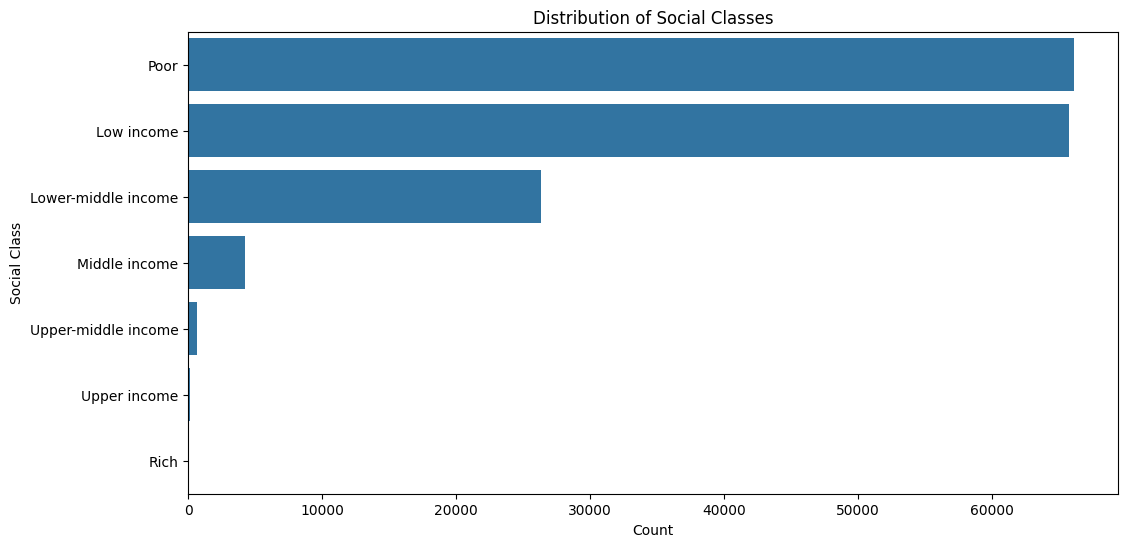

In [223]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=fe_income_group,
    order=fe_income_group["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Distribution of Social Classes")
plt.xlabel("Count")
plt.ylabel("Social Class")
plt.show()


### NCR Filtering

In [224]:
fe_ncr = fe_income_group[fe_income_group['W_REGN'] == 13]

### Outliers Handling

In [225]:
fe_totex = fe_ncr['TOTEX']

In [226]:
Q1 = fe_totex.quantile(0.25)
Q3 =fe_totex.quantile(0.75)
IQR = Q3 - Q1

In [227]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [228]:
print(f'IQR (fe_totex): {IQR}')
print(f'Lower Bound (fe_totex): {lower_bound}')
print(f'Upper Bound (fe_totex) {upper_bound}')

IQR (fe_totex): 203853.375
Lower Bound (fe_totex): -73435.3125
Upper Bound (fe_totex) 741978.1875


In [229]:
outliers = (fe_ncr["TOTEX"] < lower_bound) \
    | (fe_ncr["TOTEX"] > upper_bound)

fe_outlier_handled = fe_ncr[~outliers]


In [230]:
print(f'Number of rows before outlier handling: {len(fe_ncr)}')
print(f'Number of rows after outlier handling: {len(fe_outlier_handled)}')

Number of rows before outlier handling: 20690
Number of rows after outlier handling: 19492


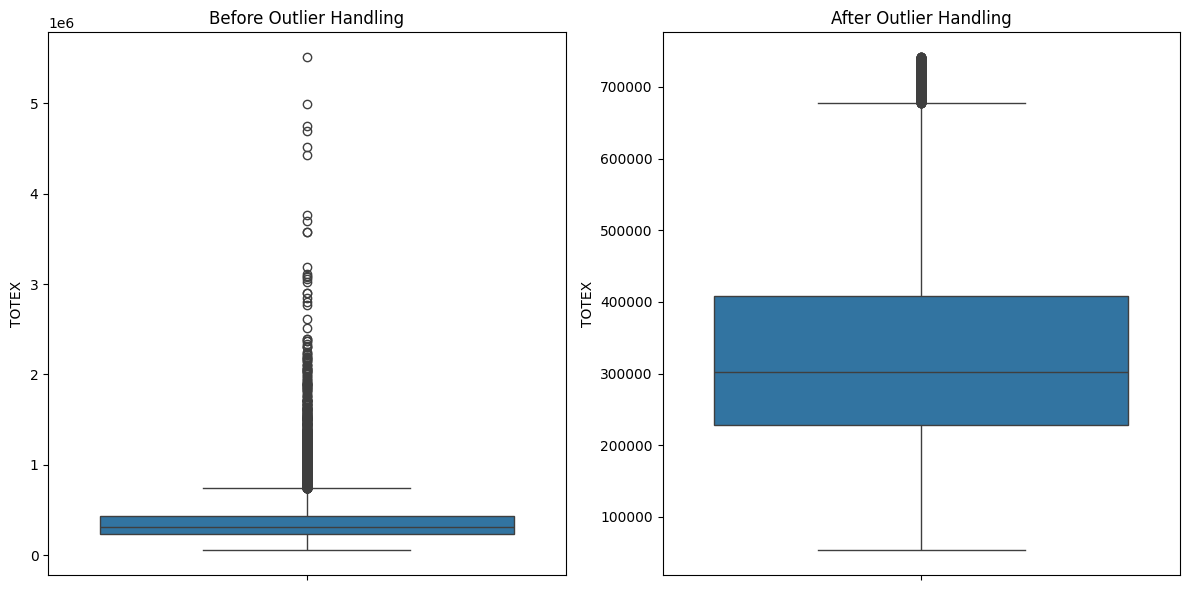

In [231]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=fe_ncr.TOTEX, ax=axes[0])
axes[0].set_title("Before Outlier Handling")

sns.boxplot(data=fe_outlier_handled.TOTEX, ax=axes[1])
axes[1].set_title("After Outlier Handling")

plt.tight_layout()
plt.show()

In [232]:
final_fies = fe_outlier_handled.copy()
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
105929,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
105930,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
105931,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
105932,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
105933,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126614,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
126615,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,105

## Export

In [233]:
final_fies.to_csv('../data/processed/cleaned_fies.csv', index=False)